# Sales Prediction


In [24]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
advertising = pd.DataFrame(pd.read_csv("/Users/lohit/Downloads/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [26]:
advertising.shape

(200, 4)

In [27]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [29]:
advertising.isnull().sum()*100/advertising.shape[1]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

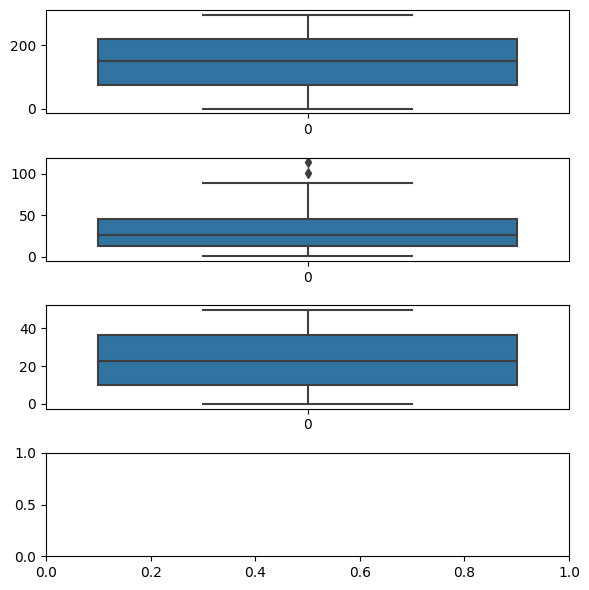

In [30]:
fig, axs = plt.subplots(4, figsize = (6,6))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [31]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

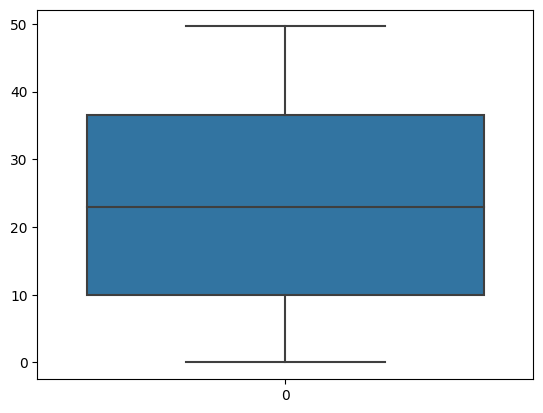

In [32]:
sns.boxplot(advertising['Radio'])
plt.show()

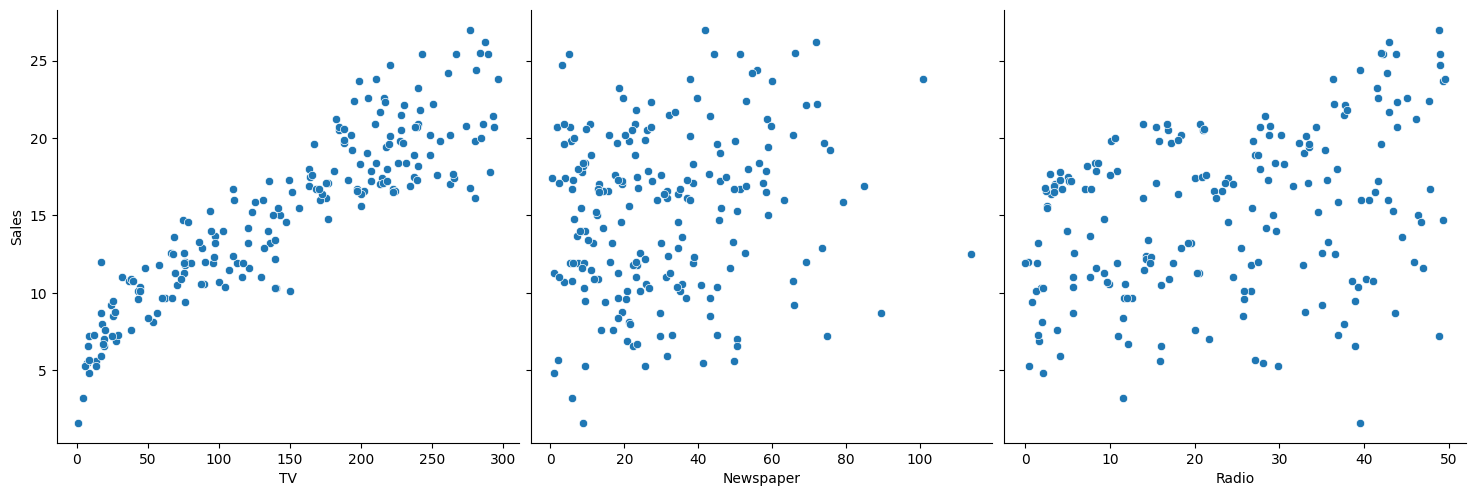

In [33]:

sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

## Model Building

In [34]:
X = advertising['TV']
y = advertising['Sales']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [37]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [38]:
import statsmodels.api as sm

In [39]:
X_train_sm = sm.add_constant(X_train)
pr = sm.OLS(y_train, X_train_sm).fit()

In [40]:
pr.params

const    6.948683
TV       0.054546
dtype: float64

In [41]:
print(pr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        19:06:49   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####  Looking at some key statistics from the summary

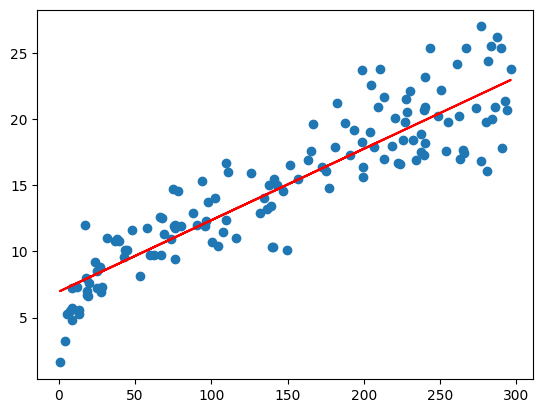

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.954 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

In [43]:
y_train_pred = pr.predict(X_train_sm)
res = (y_train - y_train_pred)

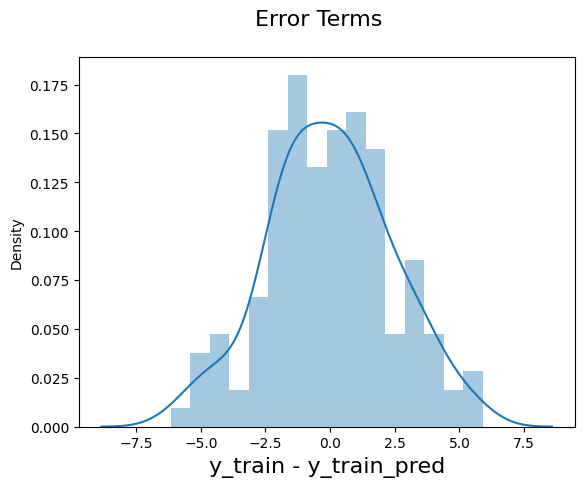

In [44]:
fig = plt.figure()
sns.distplot(res, bins = 16)
fig.suptitle('Error Terms', fontsize = 16)                  
plt.xlabel('y_train - y_train_pred', fontsize = 16)         
plt.show()

#### Looking for patterns in the residuals

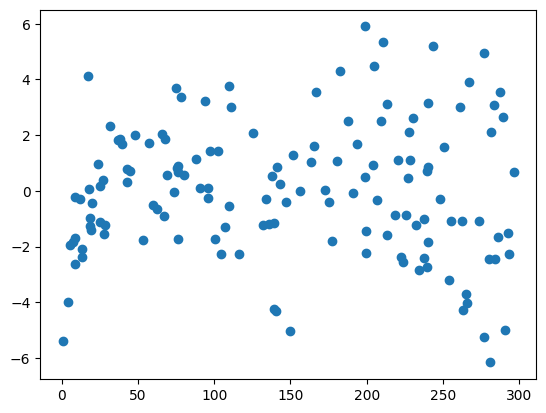

In [45]:
plt.scatter(X_train,res)
plt.show()

In [46]:

X_test_sm = sm.add_constant(X_test)
y_pred = pr.predict(X_test_sm)

In [47]:
y_pred.head(5)

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Visualizing the fit on the test set

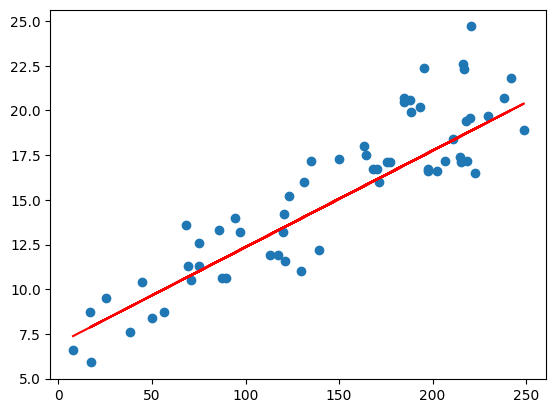

In [49]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.954 + 0.054 * X_test, 'r')
plt.show()